In [1]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2 import model_zoo
import cv2
import matplotlib.pyplot as plt

class Segmentor:
    def __init__(self):
        self.cfg = get_cfg()
        self.cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
        self.cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
        self.cfg.MODEL.WEIGHTS = "model_final.pth"
        self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
        self.cfg.MODEL.DEVICE = 'cuda'
        self.predictor = DefaultPredictor(self.cfg)

        # Register a new dataset with custom metadata cause one can't change the default metadata of COCO dataset
        self.dataset_name = "Dummy_dataset"
        DatasetCatalog.register(self.dataset_name, lambda: [])
        MetadataCatalog.get(self.dataset_name).thing_classes = ['Lungs']

    def onImage(self, imagePath):
        image = cv2.imread(imagePath)
        predictions = self.predictor(image)

        MetaData = MetadataCatalog.get(self.dataset_name)
        
        v = Visualizer(image[:, :, ::-1], MetaData, instance_mode=ColorMode.IMAGE)
        output = v.draw_instance_predictions(predictions["instances"].to("cpu"))
        
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(image[:, :, ::-1])
        plt.title("Input Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(output.get_image()[:, :, ::-1])
        plt.title("Output Image")
        plt.axis('off')
        plt.show()

        plt.figure(figsize=(20, 10))
        plt.imshow(output.get_image()[:, :, ::-1])
        plt.title("Large Predicted Image")
        plt.axis('off')
        plt.show()

detector = Segmentor()


c:\Python\Python311\Lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


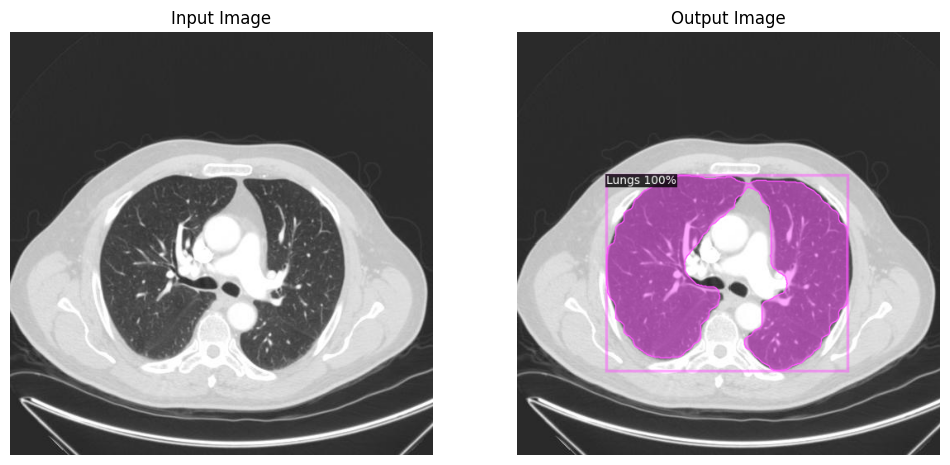

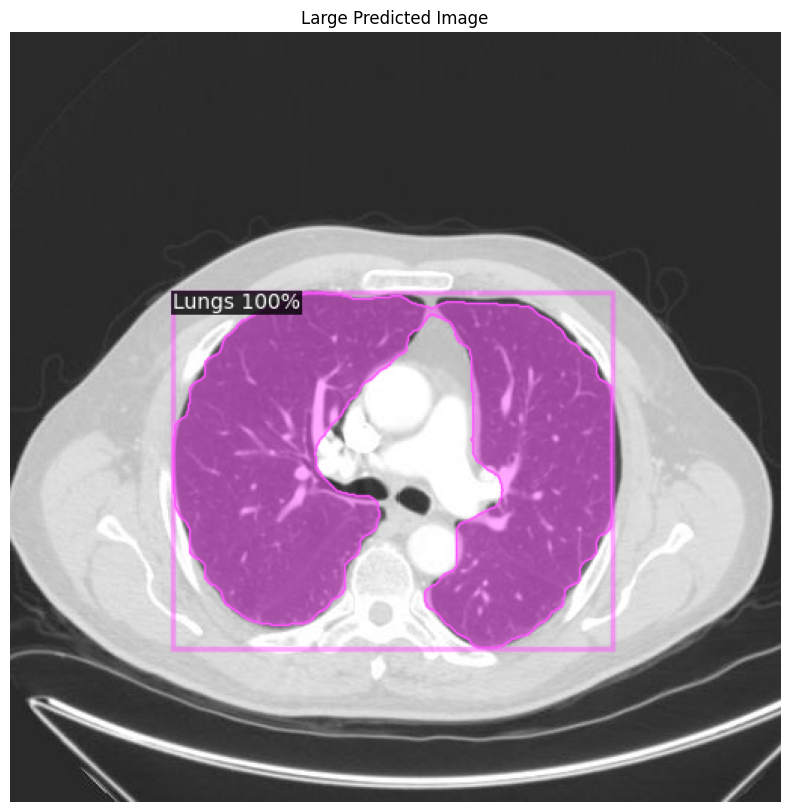

In [ ]:
# Inference on a LIDC-IDRI image
detector.onImage("1.3.6.1.4.1.14519.5.2.1.6279.6001.100111545623074826410240287249.jpg")